# PyCon2019: Hello World of Machine Learning using Scikit-learn


## [7] - K - Nearest Neighbours

_Let's understand the K Nearest Neighbour which is a Supervised Learning Algorithm falls under the category of_ __Classification__

<br/><br/>

### Splitting of Training and Test Data

We train our Machine Learning algorithms on the datasets but how do we know how our algorithms are performing?

- We can compare the result data used for training as we did during Linear Regression

__Is it Okay?__


<br/><br/>

Split the data so that we can test the algorithm on unseen data. Let's go back to our housing data example

<br/><br/>

In [1]:
import numpy as np

In [2]:
X_prop_dist = np.array([0, 20, 35, 60, 85, 120 ]).reshape(-1,1)
y_prop_price = np.array([200000, 175000, 127000, 85000, 59000, 43000]).reshape(-1,1)

<br/>

Let's provide ony first __4__ items as training data in Linear Regression Model

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
X = X_prop_dist[0:4]
X

array([[ 0],
       [20],
       [35],
       [60]])

In [5]:
y = y_prop_price[0:4,]
y

array([[200000],
       [175000],
       [127000],
       [ 85000]])

In [6]:
l_reg = LinearRegression()
l_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
X_prop_dist[4:6]

array([[ 85],
       [120]])

In [8]:
predict = l_reg.predict(X_prop_dist[4:6])

In [9]:
predict

array([[ 34433.2247557 ],
       [-35452.76872964]])

In [10]:
l_reg.score(X_prop_dist[0:4], y_prop_price[0:4])
#l_reg.score(X_prop_dist[4:6], y_prop_price[4:6])

0.9761725662176526

<br/><br/>

___The splitting is easy using Scikit Learn Test Train Split___

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_prop_dist, y_prop_price, test_size=0.25)

In [13]:
X_train

array([[120],
       [ 35],
       [ 60],
       [ 20]])

In [14]:
X_test

array([[85],
       [ 0]])

<br/><br/><br/><br/><br/>

Let's go back to KNN

### Let's generate our own data for KNN 

Marks obtained in examination and the corresponding grades

- __(80 - 100) -  Grade 'A'   - 1__
- __(60 - 79)  -  Grade 'B'   - 2__
- __(40 - 59)  -  Grade 'C'   - 3__
- __(0 - 39)   -  Grade 'F'   - 4__


This is a classic case of classification. No matter what your marks are, you'll be classified into one of these grades

<br/><br/><br/>

__Here is our training data__

In [15]:
X_marks = np.array([12, 37, 137, 99, 62, 45, 75, 81, 90, 59]).reshape(-1,1)
y_grade = np.array([4,  4,   1,  1,   2,  3,  2,  1,  1,  3]).reshape(-1,1)

In [16]:
import matplotlib.pyplot as plt

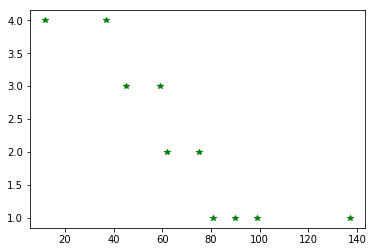

In [17]:
plt.plot(X_marks, y_grade, "g*")

<br/><br/>

<br/>

___This is what we need to import from scikit learn___

In [18]:
from sklearn.neighbors import KNeighborsClassifier

<br/><br/>

__Let's understand the meaning of K__

In simplified terms, ___K___ is the number of element that will be compared to take a decision

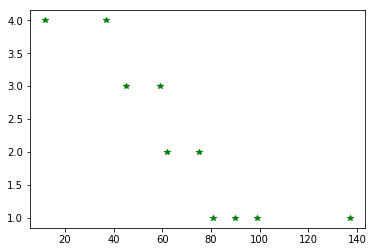

In [19]:
plt.plot(X_marks, y_grade, "g*")

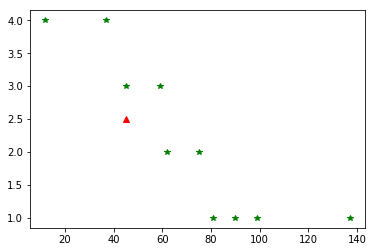

In [49]:
plt.plot(X_marks, y_grade, "g*", [[45]], [[2.5]], "r^");

<br/><br/><br/>

___K == 1___ : Nearest Point

___K == 2___ : Compare two nearest points (What if they belong to different classes)

___K == 3___ : Voting (Majority Wins)

__Some of the most widely used Distance method is__

- Euclidean Distance
- Manhattan Distance
- Hamming Distance

___Start Loop___

In [21]:
knn = KNeighborsClassifier(1)

In [22]:
X_train, X_test, y_train, y_test  = train_test_split(X_marks, y_grade, test_size = 0.2)

In [23]:
type(X_train), type(y_train), y_train

(numpy.ndarray, numpy.ndarray, array([[2],
        [2],
        [3],
        [1],
        [4],
        [4],
        [3],
        [1]]))

In [24]:
y_train = y_train.ravel()
y_train

array([2, 2, 3, 1, 4, 4, 3, 1])

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [26]:
predict = knn.predict(X_test)

In [27]:
predict, y_test

(array([1, 1]), array([[1],
        [1]]))

<br/><br/><br/>

In [28]:
score = knn.score(X_test, y_test)

In [29]:
score

1.0

<br/><br/><br/><br/>

#### Confusion Matrix 

It can also be used to check the performance of a ML Algorithm

__A Perfect ML Algorithm will have all Non Diagonal Enteries as Zero__

![](conf_matrix.png)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
predict, y_test

(array([1, 1]), array([[1],
        [1]]))

In [32]:
confusion_matrix(y_test, predict)

array([[2]])

In [33]:
predict = knn.predict(X_train)

In [34]:
predict

array([2, 2, 3, 1, 4, 4, 3, 1])

In [35]:
confusion_matrix(y_train, predict)

array([[2, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 2]])

_Let's go back and change the  K Value_

<br/>

___End Loop___

<br/><br/><br/><br/><br/>
<br/><br/>
<br/><br/>

### Exercise 

__Let's use KNN in Iris Dataset__

<br/><br/>
__It's a pure classification problem where based on the features the flower can either be iris setosa, iris versicolor and iris virginica__

<br/><br/>

In [36]:
from sklearn.datasets import load_iris

In [37]:
iris_db = load_iris()

___First : Split the data between train & test___

In [38]:
X_train, X_test, y_train, y_test = train_test_split(iris_db.data, iris_db.target, test_size=0.25)

In [39]:
X_train.shape

(112, 4)

In [40]:
X_test.shape

(38, 4)

<br/><br/><br/>

In [41]:
knn = KNeighborsClassifier(1)

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [43]:
knn.score(X_test, y_test)

1.0

<br/>

Another way of checking the score using predicted value is 'accuracy_score'

<br/>

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
predict = knn.predict(X_test)

In [46]:
accuracy_score(predict, y_test)

1.0

<br/>

Here is how the confusion matrix will look like

<br/>

In [47]:
confusion_matrix(y_test, predict)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  7]])

<br/><br/><br/><br/>

#### Exercise

Predict the best K value for Iris Data

<br/><br/><br/>

In [48]:
# Write Code